## Problem:  
predict the amount of water flowing out of a dam 
using the change of water level in a reservoir

In [1]:
#load libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import fmin_cg

In [2]:
#config libs
pd.set_option('max_rows', 5)
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4

In [3]:
#load data from .mat file
data = loadmat('ex5data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [4]:
#initialize train, validation and test data
X_train, y_train = data['X'], data['y']
X_test, y_test = data['Xtest'], data['ytest']
X_valid, y_valid = data['Xval'], data['yval']
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
print("X_valid shape:", X_valid.shape, "y_valid shape:", y_valid.shape)

X_train shape: (12, 1) y_train shape: (12, 1)
X_test shape: (21, 1) y_test shape: (21, 1)
X_valid shape: (21, 1) y_valid shape: (21, 1)


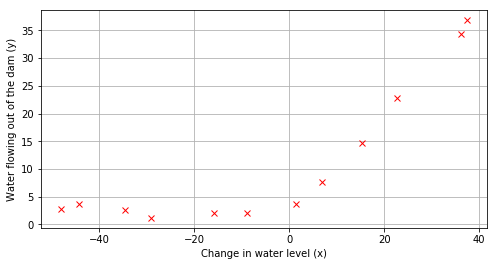

In [5]:
#visualize train data
def draw_data(X, y):
    #plt.scatter(x=X, y=y, marker='x', c='red')
    plt.plot(X, y, 'rx')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.grid(True)
    plt.show()
    
draw_data(X_train, y_train)

In [6]:
#set model variables
theta_initial = np.array([1, 1])
lmbda = 1

In [7]:
#insert intercept term into train data
X_train_int = np.insert(X_train, 0, 1, axis=1)
X_train_int

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [8]:
#insert intercept term into validation and test data
X_valid_int = np.insert(X_valid, 0, 1, axis=1)
X_test_int = np.insert(X_test, 0, 1, axis=1)
X_test_int

array([[  1.        , -33.31800399],
       [  1.        , -37.91216403],
       [  1.        , -51.20693795],
       [  1.        ,  -6.13259585],
       [  1.        ,  21.26118327],
       [  1.        , -40.31952949],
       [  1.        , -14.54153167],
       [  1.        ,  32.55976024],
       [  1.        ,  13.39343255],
       [  1.        ,  44.20988595],
       [  1.        ,  -1.14267768],
       [  1.        , -12.76686065],
       [  1.        ,  34.05450539],
       [  1.        ,  39.22350028],
       [  1.        ,   1.97449674],
       [  1.        ,  29.6217551 ],
       [  1.        , -23.66962971],
       [  1.        ,  -9.01180139],
       [  1.        , -55.94057091],
       [  1.        , -35.70859752],
       [  1.        ,   9.51020533]])

In [9]:
def h(X, theta):
    """ hypothesis function """
    return np.dot(X, theta)

In [10]:
def costFunction(theta, X, y, lmbda):
    m = X.shape[0]
    hypothesis = h(X, theta).reshape((m, 1)) # pack each element in array 
    J = float(1/(2*m) * np.dot((hypothesis - y).T, (hypothesis - y)))
    regularization = lmbda/(2*m) * np.dot(theta[1:], theta[1:])
    
    return J + regularization

#expected cost 303.993
costFunction(theta_initial, X_train_int, y_train, lmbda)

303.9931922202643

In [11]:
def gradient(theta, X, y, lmbda):
    m = X.shape[0]
    hypothesis = h(X, theta).reshape((m, 1))
    grad = float(1 / m) * np.dot((hypothesis - y).T, X)
    regularization = float(lmbda / m) * theta
    regularization[0] = 0 
    
    return (grad + regularization).flatten()

#expected [-15.30; 598.250].
gradient(theta_initial, X_train_int, y_train, lmbda)

array([-15.30301567, 598.25074417])

In [12]:
def optimizeTheta(theta_initial, X, y, lmbda=0., print_output=True):
    """compute the optimal values of θ"""
    theta_opt = fmin_cg(costFunction, 
                        x0=theta_initial, 
                        fprime=gradient, 
                        args=(X, y, lmbda),
                        maxiter=1000,
                        epsilon=1.49e-12,
                        disp=print_output)
    return theta_opt

In [13]:
theta_opt = optimizeTheta(theta_initial, X_train_int, y_train, 0)
theta_opt

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


array([13.08790734,  0.36777925])

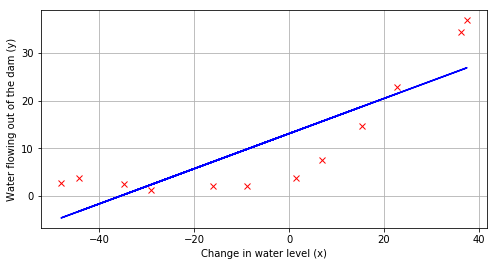

In [14]:
plt.plot(X_train, h(X_train_int, theta_opt).flatten(), c='blue')
draw_data(X_train, y_train)

# Learning curves

Print a chart that shows how error changes when the training set goes up. We need te have a matrix of: training set size (tss) 1 - error size, tss 2 - error size etc.. Reuse existing cost function and set lmbda to 0 so regularization == 0

> When you are computing the training set error, make sure you compute it on the training subset (i.e., X(1:n,:) and y(1:n)) (instead of the entire training set). However, for the cross validation error, you should compute it over the entire cross validation set. 

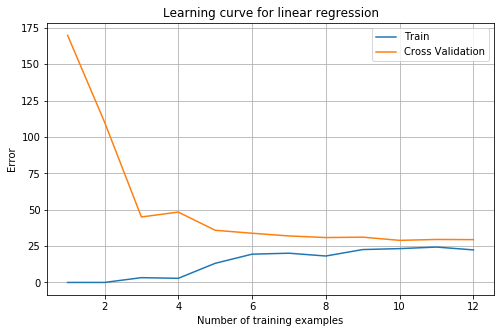

In [19]:
def plotLearningCurve():
    """
    Loop over first training point, then first 2 training points, then first 3 ...
    and use each training-set-subset to find trained parameters.
    With those parameters, compute the cost on that subset (Jtrain)
    remembering that for Jtrain, lambda = 0 (even if you are using regularization).
    Then, use the trained parameters to compute Jval on the entire validation set
    again forcing lambda = 0 even if using regularization.
    Store the computed errors, error_train and error_val and plot them.
    """
    initial_theta = np.array([[1.],[1.]])
    mym, error_train, error_val = [], [], []
    for x in range(1,13,1):
        train_subset = X_train_int[:x,:]
        y_subset = y_train[:x]
        mym.append(y_subset.shape[0])
        fit_theta = optimizeTheta(initial_theta,train_subset,y_subset,lmbda=0.,print_output=False)
        error_train.append(costFunction(fit_theta,train_subset,y_subset,lmbda=0.))
        error_val.append(costFunction(fit_theta,X_valid_int,y_valid,lmbda=0.))
        
    plt.figure(figsize=(8,5))
    plt.plot(mym,error_train,label='Train')
    plt.plot(mym,error_val,label='Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.grid(True)
    
plotLearningCurve()